# Component Failure Prediction
## Model Training File

### Task
1. Predict Component Level (serial number) unscheduled removals [quick link](#model_prediction)
2. Show different stages of ML Pipeline (EDA, feature selection, data manipulation)
3. Bring ML Pipeline in production (TBU)
4. Provide API endpoints (TBU)
5. requirements.txt file [quick link](#requirements)

<a id='index'></a>
### Index
- [Libraries](#libraries)
- 9. [Model Building and Training](#model_building)
    - 9.1 [Kaplan Meier Model](#km)
    - 9.2 [Kaplan Meier Estimate of Individual Features](#kmi)
        - 9.2.1 [Estimation for Operator](#km1)
        - 9.2.2 [Estimation for Fleet](#km2)
        - 9.2.3 [Estimation for Aircraft](#km3)        
    - 9.3 [Cox Proportional Hazard Model](#cph)
        - 9.3.1 [CoxPH Model Data Summary](#cphs)
        - 9.3.2 [Individual Component Survival Regression](#cphi)    
- 10. [Model Predicted Probability](#model_prediction)
- [Requirements.txt](#requirements)
- [End](#end)



<a id='report'></a>
### Report Links

- 1. Data Cleaning (Other File)
- 2. Exploratory Analysis (Other File)
- 3. Feature Selection (Other File)
- 4. Feature Engineering (Other File)
- 5. [Model Training](#cphs)
- 6. [Model Summary](#cphs)
- 7. [Individual Component Predictions](#model_prediction)

<a id='libraries'></a>
###  Libraries
[Go to Index](#index)

In [18]:

import sys
sys.path.append('/usr/local/lib/python2.7/dist-packages')
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages')

import pandas as pd
import session_info

# EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Lifeline package for the Survival Analysis
from lifelines.plotting import plot_lifetimes
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter  

In [2]:
%pylab inline
figsize(12,6)


Populating the interactive namespace from numpy and matplotlib


<a id='model_building'></a>
## 9. Model Building and Training
[Go to Index](#index)

In [3]:
df = pd.read_csv('data/processed/filtered_data.csv')
print(df.head())

   FLEET_CD  AIRCRAFT_CD OPERATOR_CD  TIME_SINCE_INSTALL_CYCLES  \
0       737          479         VST                          0   
1       737          478         VST                       2325   
2       737          478         VST                          8   
3       737          479         VST                         24   
4       737          479         VST                          6   

   REPETITIVE_FAULT_QT     MEL_QTY  REMOVED_BOOL  COMPONENT_LIFE_DAYS  \
0                    0  165.974648             1                    0   
1                    9  366.000000             1                  848   
2                    1    1.000000             1                    2   
3                    2    7.000000             1                   15   
4                    1  165.974648             1                    1   

   AIRCRAFT_AGE  
0          8030  
1          5840  
2          6570  
3          6935  
4          7300  


<a id='km'></a>
### 9.1 Kaplan Meier Model
#### Estimate of Component Failure
[Go to Index](#index)

<AxesSubplot:xlabel='timeline'>

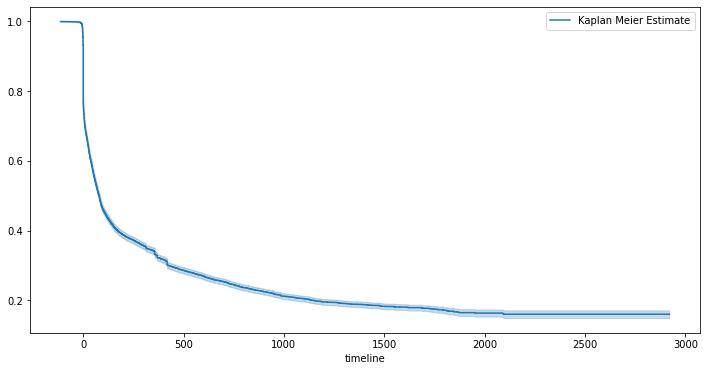

In [4]:
durations = df['COMPONENT_LIFE_DAYS'] ## Time to event data of censored and event data
event_observed = df['REMOVED_BOOL']  ## It has removed as (1) and installed as (0)

## create a kmf object as km
km = KaplanMeierFitter() ## instantiate the class to create an object

## Fit the data into the model
km.fit(durations, event_observed, label='Kaplan Meier Estimate')

## Create an estimate
km.plot()

<a id='kmi'></a>
### 9.2 Kaplan Meier Estimation for Individual Features
[Go to Index](#index)

<a id='km1'></a>
#### 9.2.1 Kaplan Meier Estimation for Operator

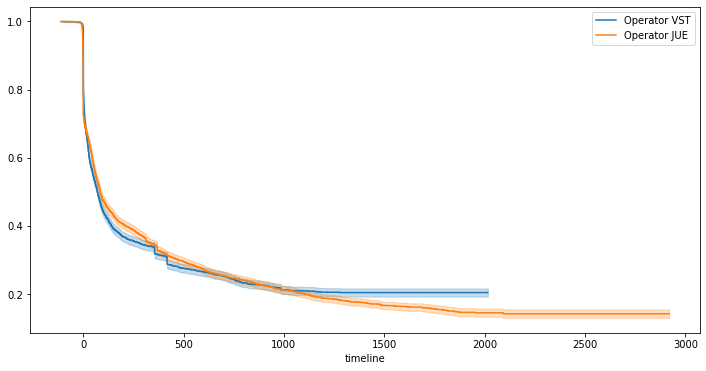

In [5]:
kmf = KaplanMeierFitter() 


T = df['COMPONENT_LIFE_DAYS']     ## time to event
E = df['REMOVED_BOOL']      ## event occurred or censored


groups = df['OPERATOR_CD']             ## Create the cohorts from the 'Contract' column
ix1 = (groups == 'VST')   ## Cohort 1
ix2 = (groups == 'JUE')         ## Cohort 2
         ## Cohort 3


kmf.fit(T[ix1], E[ix1], label='Operator VST')    ## fit the cohort 1 data
ax = kmf.plot()


kmf.fit(T[ix2], E[ix2], label='Operator JUE')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax)


<a id='km2'></a>
#### 9.2.2 Kaplan Meier Estimation for Fleet
[Go to Index](#index)

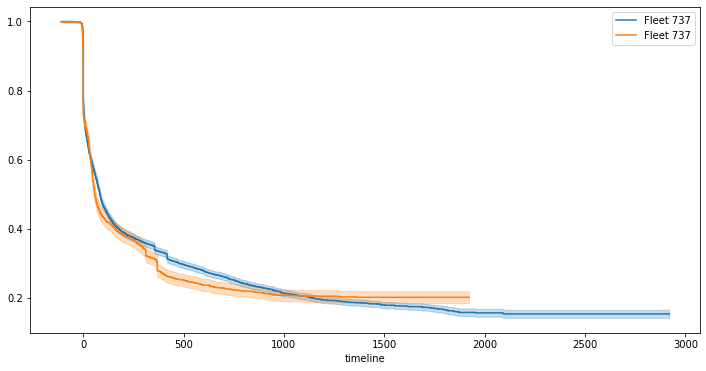

In [6]:
kmf = KaplanMeierFitter() 

groups = df['FLEET_CD']             ## Create the cohorts from the 'Contract' column
ix1 = (groups == 737)   ## Cohort 1
ix2 = (groups == 787)         ## Cohort 2
         ## Cohort 3

kmf.fit(T[ix1], E[ix1], label='Fleet 737')    ## fit the cohort 1 data
ax = kmf.plot()

kmf.fit(T[ix2], E[ix2], label='Fleet 737')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax)

<a id='km3'></a>
#### 9.2.3 Kaplan Meier Estimation for Aircraft
[Go to Index](#index)

In [7]:
df['AIRCRAFT_CD'].value_counts(dropna= False)

763    1576
784    1472
955    1361
478    1317
835    1177
479    1092
527     965
915     830
925     499
708      34
Name: AIRCRAFT_CD, dtype: int64

<AxesSubplot:xlabel='timeline'>

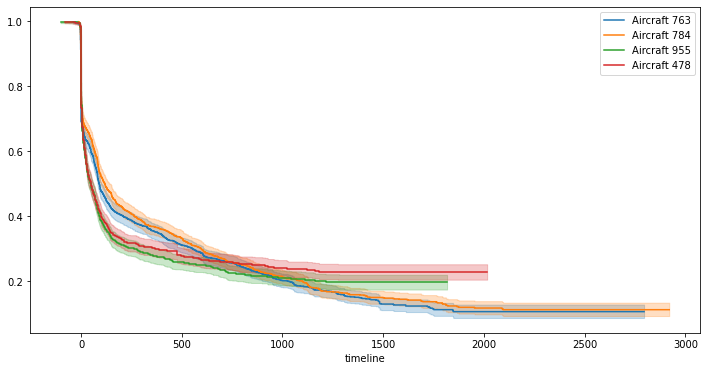

In [8]:
kmf = KaplanMeierFitter() 

groups = df['AIRCRAFT_CD']
ix1 = (groups == 763)
ix2 = (groups == 784)
ix3 = (groups == 955)
ix4 = (groups == 478)



## fit the cohort 1 data
kmf.fit(T[ix1], E[ix1], label='Aircraft 763')
ax = kmf.plot()
## fit the cohort 2 data
kmf.fit(T[ix2], E[ix2], label='Aircraft 784')
ax1 = kmf.plot(ax=ax)
## fit the cohort 3 data
kmf.fit(T[ix3], E[ix3], label='Aircraft 955')
kmf.plot(ax=ax1)
## fit the cohort 4 data
kmf.fit(T[ix4], E[ix4], label='Aircraft 478')
kmf.plot(ax=ax1)




<AxesSubplot:xlabel='timeline'>

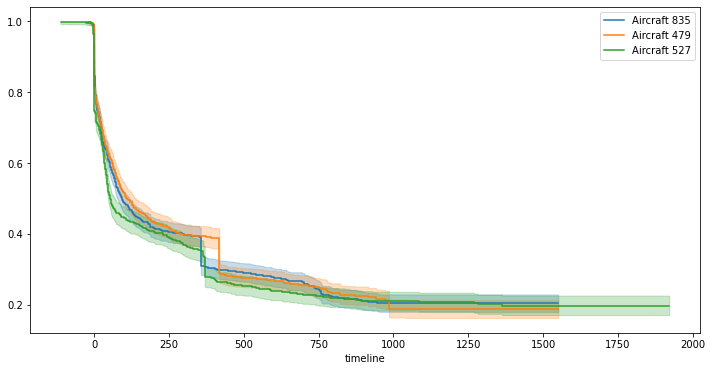

In [9]:


kmf = KaplanMeierFitter() 
ix5 = (groups == 835)
ix6 = (groups == 479)
ix7 = (groups == 527)

## fit the cohort 5 data
kmf.fit(T[ix5], E[ix5], label='Aircraft 835')
ax2 = kmf.plot()
## fit the cohort 6 data
kmf.fit(T[ix6], E[ix6], label='Aircraft 479')
ax3 = kmf.plot(ax=ax2)
## fit the cohort 7 data
kmf.fit(T[ix7], E[ix7], label='Aircraft 527')
kmf.plot(ax=ax3)




<AxesSubplot:xlabel='timeline'>

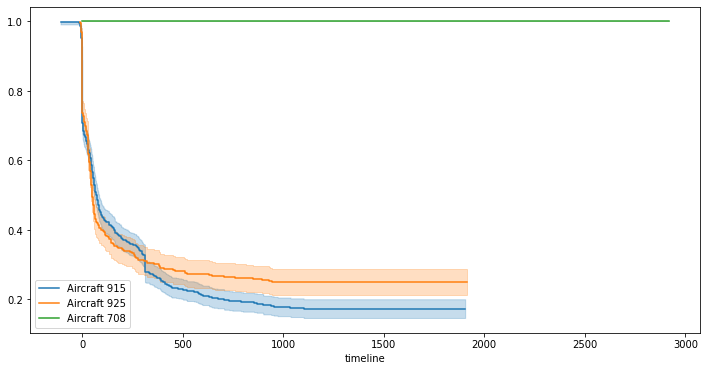

In [10]:
kmf = KaplanMeierFitter() 
ix8 = (groups == 915)
ix9 = (groups == 925)
ix10 = (groups == 708)



## fit the cohort 8 data
kmf.fit(T[ix8], E[ix8], label='Aircraft 915')
ax4 = kmf.plot()
## fit the cohort 9 data
kmf.fit(T[ix9], E[ix9], label='Aircraft 925')
ax5 = kmf.plot(ax=ax4)
## fit the cohort 10 data
kmf.fit(T[ix10], E[ix10], label='Aircraft 708')
kmf.plot(ax=ax5)




<a id='cph'></a>
### 9.3 Cox Proportional Hazard Model 

On Running Cox Proportional Model, the features **AIRCRAFT_CD, OPERATOR_CD, and FLEET_CD** showed high correlation for the model to train, therefore had to be dropped.

[Go to Index](#index)

In [11]:

df.drop(['AIRCRAFT_CD','OPERATOR_CD','FLEET_CD'], axis=1, inplace=True)

In [12]:
print(df.head())

   TIME_SINCE_INSTALL_CYCLES  REPETITIVE_FAULT_QT     MEL_QTY  REMOVED_BOOL  \
0                          0                    0  165.974648             1   
1                       2325                    9  366.000000             1   
2                          8                    1    1.000000             1   
3                         24                    2    7.000000             1   
4                          6                    1  165.974648             1   

   COMPONENT_LIFE_DAYS  AIRCRAFT_AGE  
0                    0          8030  
1                  848          5840  
2                    2          6570  
3                   15          6935  
4                    1          7300  


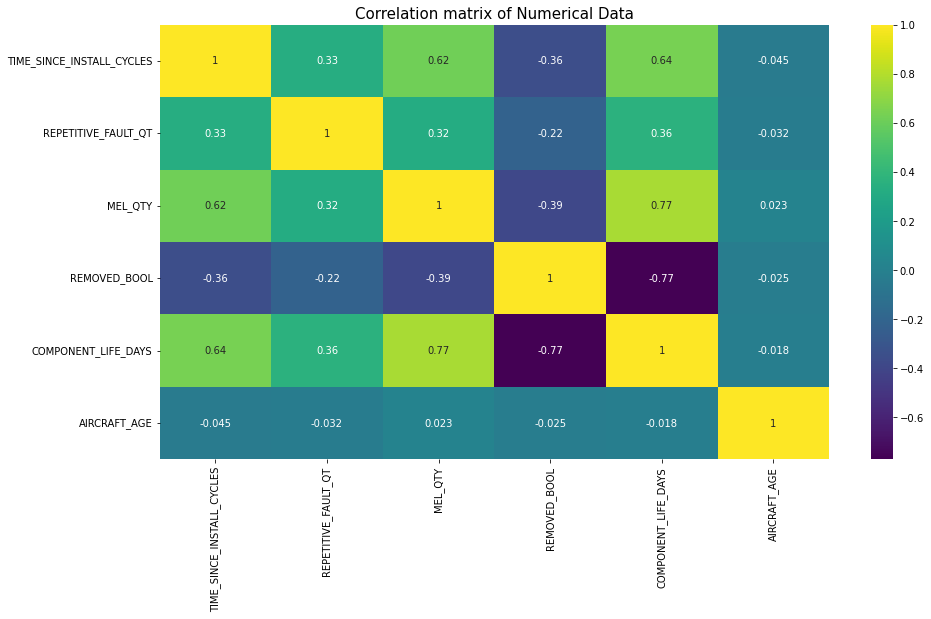

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True, cmap='viridis')
plt.title('Correlation matrix of Numerical Data',fontsize =15)
plt.show()

<a id='cphs'></a>
#### 9.3.1 CoxPH Model Data Summary

[Go to Index](#index)

In [14]:
# Using Cox Proportional Hazards model
cph = CoxPHFitter() 
cph.fit(df, 'COMPONENT_LIFE_DAYS', event_col='REMOVED_BOOL')  
cph.print_summary()    ## HAve a look at the significance of the features

<lifelines.CoxPHFitter: fitted with 10323 total observations, 2141 right-censored observations>
             duration col = 'COMPONENT_LIFE_DAYS'
                event col = 'REMOVED_BOOL'
      baseline estimation = breslow
   number of observations = 10323
number of events observed = 8182
   partial log-likelihood = -67955.53
         time fit was run = 2021-12-21 05:50:53 UTC

---
                            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                         
TIME_SINCE_INSTALL_CYCLES  -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
REPETITIVE_FAULT_QT        -0.05       0.95       0.00            -0.06            -0.04                 0.95                 0.96
MEL_QTY                    -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
AIRCRAFT_AGE               -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00

                               z      p   -log2(p)
covariate                                         
TIME_SINCE_INSTALL_CYCLES -41.96 <0.005        inf
REPETITIVE_FAULT_QT       -12.55 <0.005     117.63
MEL_QTY                    -9.55 <0.005      69.43
AIRCRAFT_AGE               -5.62 <0.005      25.63
---
Concordance = 0.80
Partial AIC = 135919.06
log-likelihood ratio test = 5050.55 on 4 df
-log2(p) of ll-ratio test = inf

<a id='cphi'></a>
#### 9.3.2 Individual Component Survival Regression

[Go to Index](#index)

In [15]:
## Survival curve at the Componenet level. Selecting any 5 Components (rows 20 till 25).

cols = ['COMPONENT_LIFE_DAYS', 'REMOVED_BOOL', 'TIME_SINCE_INSTALL_CYCLES', 'REPETITIVE_FAULT_QT',
        'MEL_QTY', 'AIRCRAFT_AGE']
df = df[cols]
tr_rows = df.iloc[20:25, 2:]
tr_rows

,TIME_SINCE_INSTALL_CYCLES,REPETITIVE_FAULT_QT,MEL_QTY,AIRCRAFT_AGE
20,274,2,51.0,6570
21,225,0,32.0,7300
22,206,0,23.0,7300
23,1411,2,200.0,6935
24,42,1,7.0,6205


<a id='model_prediction'></a>
## 10. Model Prediction for Individual Component
In Days

[Go to Index](#index)

<AxesSubplot:>

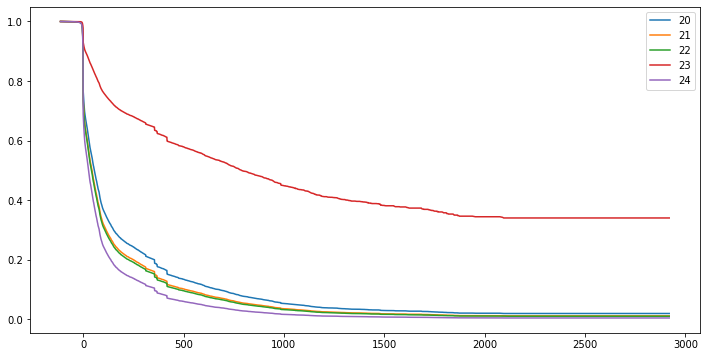

In [16]:
cph.predict_survival_function(tr_rows).plot()

<a id='requirements'></a>
### Requirements.txt (libraries used in session)
Click below to expand

In [19]:
session_info.show()

<a id='end'></a>
EOF

[Go to Index](#index)